Made with ♥ by Thomas Rüegg and Patrick Wissiak

# Introduction
In this Jupyter Notebook, we'll introduce a convolutional neural network that is underfitting, then, create a new model that will overfit to the training data. Since that will not be the desired behavior, we'll showcase various methods to defeat overfitting, resulting in a model that'll be optimal. We'll discuss learnings and wrap everything up with a summary and an outlook.

# General Information

## Environment Setup
Here we're providing our environment yaml file to use the same environment as we did to run the project. 
```
name: aiap
channels:
  - apple
  - conda-forge
dependencies:
  - anyio=3.6.2=pyhd8ed1ab_0
  - appnope=0.1.3=pyhd8ed1ab_0
  - argon2-cffi=21.3.0=pyhd8ed1ab_0
  - argon2-cffi-bindings=21.2.0=py310h8e9501a_3
  - asttokens=2.2.1=pyhd8ed1ab_0
  - attrs=22.2.0=pyh71513ae_0
  - backcall=0.2.0=pyh9f0ad1d_0
  - backports=1.0=pyhd8ed1ab_3
  - backports.functools_lru_cache=1.6.4=pyhd8ed1ab_0
  - beautifulsoup4=4.11.2=pyha770c72_0
  - bleach=6.0.0=pyhd8ed1ab_0
  - brotli=1.0.9=h1a8c8d9_8
  - brotli-bin=1.0.9=h1a8c8d9_8
  - brotlipy=0.7.0=py310h8e9501a_1005
  - bzip2=1.0.8=h3422bc3_4
  - c-ares=1.18.1=h3422bc3_0
  - ca-certificates=2022.12.7=h4653dfc_0
  - cached-property=1.5.2=hd8ed1ab_1
  - cached_property=1.5.2=pyha770c72_1
  - cffi=1.15.1=py310h2399d43_3
  - comm=0.1.2=pyhd8ed1ab_0
  - cryptography=39.0.2=py310hfc83b78_0
  - cycler=0.11.0=pyhd8ed1ab_0
  - debugpy=1.6.6=py310h0f1eb42_0
  - decorator=5.1.1=pyhd8ed1ab_0
  - defusedxml=0.7.1=pyhd8ed1ab_0
  - entrypoints=0.4=pyhd8ed1ab_0
  - executing=1.2.0=pyhd8ed1ab_0
  - flit-core=3.8.0=pyhd8ed1ab_0
  - fonttools=4.39.0=py310h8e9501a_0
  - freetype=2.12.1=hd633e50_1
  - grpcio=1.46.3=py310ha26ec5d_0
  - h5py=3.6.0=nompi_py310hb8bbf05_100
  - hdf5=1.12.1=nompi_hd9dbc9e_104
  - idna=3.4=pyhd8ed1ab_0
  - importlib-metadata=6.0.0=pyha770c72_0
  - importlib_resources=5.12.0=pyhd8ed1ab_0
  - ipykernel=6.21.2=pyh736e0ef_0
  - ipython=8.11.0=pyhd1c38e8_0
  - ipython_genutils=0.2.0=py_1
  - jedi=0.18.2=pyhd8ed1ab_0
  - jinja2=3.1.2=pyhd8ed1ab_1
  - joblib=1.2.0=pyhd8ed1ab_0
  - jsonschema=4.17.3=pyhd8ed1ab_0
  - jupyter_client=7.4.9=pyhd8ed1ab_0
  - jupyter_core=5.2.0=py310hbe9552e_0
  - jupyter_events=0.6.3=pyhd8ed1ab_0
  - jupyter_server=2.4.0=pyhd8ed1ab_0
  - jupyter_server_terminals=0.4.4=pyhd8ed1ab_1
  - jupyterlab_pygments=0.2.2=pyhd8ed1ab_0
  - kiwisolver=1.4.4=py310h2887b22_1
  - krb5=1.20.1=h69eda48_0
  - lcms2=2.15=hd835a16_1
  - lerc=4.0.0=h9a09cb3_0
  - libblas=3.9.0=16_osxarm64_openblas
  - libbrotlicommon=1.0.9=h1a8c8d9_8
  - libbrotlidec=1.0.9=h1a8c8d9_8
  - libbrotlienc=1.0.9=h1a8c8d9_8
  - libcblas=3.9.0=16_osxarm64_openblas
  - libcurl=7.88.1=h9049daf_0
  - libcxx=15.0.7=h75e25f2_0
  - libdeflate=1.17=h1a8c8d9_0
  - libedit=3.1.20191231=hc8eb9b7_2
  - libev=4.33=h642e427_1
  - libffi=3.4.2=h3422bc3_5
  - libgfortran=5.0.0=12_2_0_hd922786_31
  - libgfortran5=12.2.0=h0eea778_31
  - libjpeg-turbo=2.1.5.1=h1a8c8d9_0
  - liblapack=3.9.0=16_osxarm64_openblas
  - libnghttp2=1.52.0=hae82a92_0
  - libopenblas=0.3.21=openmp_hc731615_3
  - libpng=1.6.39=h76d750c_0
  - libprotobuf=3.19.4=hccf11d3_0
  - libsodium=1.0.18=h27ca646_1
  - libsqlite=3.40.0=h76d750c_0
  - libssh2=1.10.0=h7a5bd25_3
  - libtiff=4.5.0=hdc14d85_5
  - libwebp-base=1.3.0=h1a8c8d9_0
  - libxcb=1.13=h9b22ae9_1004
  - libzlib=1.2.13=h03a7124_4
  - llvm-openmp=15.0.7=h7cfbb63_0
  - markupsafe=2.1.2=py310h8e9501a_0
  - matplotlib=3.5.0=py310hb6292c7_0
  - matplotlib-base=3.5.0=py310hacb9267_0
  - matplotlib-inline=0.1.6=pyhd8ed1ab_0
  - mistune=2.0.5=pyhd8ed1ab_0
  - munkres=1.1.4=pyh9f0ad1d_0
  - nbclassic=0.5.3=pyhb4ecaf3_3
  - nbclient=0.7.2=pyhd8ed1ab_0
  - nbconvert=7.2.9=pyhd8ed1ab_0
  - nbconvert-core=7.2.9=pyhd8ed1ab_0
  - nbconvert-pandoc=7.2.9=pyhd8ed1ab_0
  - nbformat=5.7.3=pyhd8ed1ab_0
  - ncurses=6.3=h07bb92c_1
  - nest-asyncio=1.5.6=pyhd8ed1ab_0
  - notebook=6.5.3=pyha770c72_0
  - notebook-shim=0.2.2=pyhd8ed1ab_0
  - numpy=1.23.2=py310h127c7cf_0
  - openjpeg=2.5.0=hbc2ba62_2
  - openssl=3.0.8=h03a7124_0
  - packaging=23.0=pyhd8ed1ab_0
  - pandoc=2.19.2=hce30654_2
  - pandocfilters=1.5.0=pyhd8ed1ab_0
  - parso=0.8.3=pyhd8ed1ab_0
  - pexpect=4.8.0=pyh1a96a4e_2
  - pickleshare=0.7.5=py_1003
  - pillow=9.4.0=py310h07496d3_2
  - pip=23.0.1=pyhd8ed1ab_0
  - pkgutil-resolve-name=1.3.10=pyhd8ed1ab_0
  - platformdirs=3.1.1=pyhd8ed1ab_0
  - pooch=1.7.0=pyhd8ed1ab_0
  - prometheus_client=0.16.0=pyhd8ed1ab_0
  - prompt-toolkit=3.0.38=pyha770c72_0
  - prompt_toolkit=3.0.38=hd8ed1ab_0
  - protobuf=3.19.4=py310h1b49c16_0
  - psutil=5.9.4=py310h8e9501a_0
  - pthread-stubs=0.4=h27ca646_1001
  - ptyprocess=0.7.0=pyhd3deb0d_0
  - pure_eval=0.2.2=pyhd8ed1ab_0
  - pycparser=2.21=pyhd8ed1ab_0
  - pygments=2.14.0=pyhd8ed1ab_0
  - pyopenssl=23.0.0=pyhd8ed1ab_0
  - pyparsing=3.0.9=pyhd8ed1ab_0
  - pyrsistent=0.19.3=py310h8e9501a_0
  - pysocks=1.7.1=pyha2e5f31_6
  - python=3.10.9=h3ba56d0_0_cpython
  - python-dateutil=2.8.2=pyhd8ed1ab_0
  - python-fastjsonschema=2.16.3=pyhd8ed1ab_0
  - python-json-logger=2.0.7=pyhd8ed1ab_0
  - python_abi=3.10=3_cp310
  - pyyaml=6.0=py310h8e9501a_5
  - pyzmq=24.0.1=py310hc407298_1
  - readline=8.1.2=h46ed386_0
  - requests=2.28.2=pyhd8ed1ab_0
  - rfc3339-validator=0.1.4=pyhd8ed1ab_0
  - rfc3986-validator=0.1.1=pyh9f0ad1d_0
  - scikit-learn=1.2.1=py310ha00a7cd_0
  - scipy=1.10.1=py310ha0d8a01_0
  - send2trash=1.8.0=pyhd8ed1ab_0
  - setuptools=67.6.0=pyhd8ed1ab_0
  - six=1.16.0=pyh6c4a22f_0
  - sniffio=1.3.0=pyhd8ed1ab_0
  - soupsieve=2.3.2.post1=pyhd8ed1ab_0
  - stack_data=0.6.2=pyhd8ed1ab_0
  - tensorflow-deps=2.10.0=0
  - terminado=0.17.1=pyhd1c38e8_0
  - threadpoolctl=3.1.0=pyh8a188c0_0
  - tinycss2=1.2.1=pyhd8ed1ab_0
  - tk=8.6.12=he1e0b03_0
  - tornado=6.2=py310h8e9501a_1
  - traitlets=5.9.0=pyhd8ed1ab_0
  - typing-extensions=4.5.0=hd8ed1ab_0
  - typing_extensions=4.5.0=pyha770c72_0
  - tzdata=2022g=h191b570_0
  - unicodedata2=15.0.0=py310h8e9501a_0
  - urllib3=1.26.15=pyhd8ed1ab_0
  - wcwidth=0.2.6=pyhd8ed1ab_0
  - webencodings=0.5.1=py_1
  - websocket-client=1.5.1=pyhd8ed1ab_0
  - wheel=0.38.4=pyhd8ed1ab_0
  - xorg-libxau=1.0.9=h27ca646_0
  - xorg-libxdmcp=1.1.3=h27ca646_0
  - xz=5.2.6=h57fd34a_0
  - yaml=0.2.5=h3422bc3_2
  - zeromq=4.3.4=hbdafb3b_1
  - zipp=3.15.0=pyhd8ed1ab_0
  - zlib=1.2.13=h03a7124_4
  - zstd=1.5.2=hf913c23_6
  - pip:
      - absl-py==1.4.0
      - arrow==1.2.3
      - astunparse==1.6.3
      - cachetools==5.3.0
      - certifi==2022.12.7
      - charset-normalizer==3.1.0
      - extra-keras-datasets==1.2.0
      - flatbuffers==1.12
      - fqdn==1.5.1
      - gast==0.4.0
      - google-auth==2.16.2
      - google-auth-oauthlib==0.4.6
      - google-pasta==0.2.0
      - ipython-genutils==0.2.0
      - isoduration==20.11.0
      - jsonpointer==2.3
      - jupyter-server==2.3.0
      - keras==2.9.0
      - keras-preprocessing==1.1.2
      - libclang==15.0.6.1
      - markdown==3.4.1
      - oauthlib==3.2.2
      - opt-einsum==3.3.0
      - pandas==1.5.3
      - pyasn1==0.4.8
      - pyasn1-modules==0.2.8
      - pytz==2022.7.1
      - qtconsole==5.4.0
      - qtpy==2.3.0
      - requests-oauthlib==1.3.1
      - rsa==4.9
      - scikeras==0.10.0
      - tensorboard==2.9.1
      - tensorboard-data-server==0.6.1
      - tensorboard-plugin-wit==1.8.1
      - tensorcross==0.4.4
      - tensorflow-estimator==2.9.0
      - tensorflow-macos==2.9.0
      - tensorflow-metal==0.5.1
      - termcolor==2.2.0
      - uri-template==1.2.0
      - webcolors==1.12
      - werkzeug==2.2.3
      - wrapt==1.15.0

```

## The Dataset

We used [this dataset from kaggle](https://www.kaggle.com/datasets/puneet6060/intel-image-classification) for our miniproject.

The dataset contains 6 classes of images: `building`, `forest`, `glacier`, `mountain`, `sea`, and `street`. We decided to delete the class `street` and it's corresponding pictures to simplify the learning process. The images are divided into folders with their respective labels. We used the `image_dataset_from_directory` method of Keras to convert the images into a TensorFlow dataset object for training.

The dataset fulfills all of the requirements posed in the assignment:
- from 4 to 15 classes (had 6, now 5) ✓
- minimum of 500 samples per class (has ~2300) ✓
- less than 150k samples in total (has 24.3k) ✓


## Importing the Data

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.client import device_lib
from sklearn import metrics

print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 808066976812797987
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
locality {
  bus_id: 1
}
incarnation: 2375894909209499059
physical_device_desc: "device: 0, name: METAL, pci bus id: <undefined>"
xla_global_id: -1
]


2023-03-16 15:36:07.826877: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-16 15:36:07.826899: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [21]:
from tensorflow.keras.utils import image_dataset_from_directory
training_img_path = "./dataset/seg_train/seg_train/"

img_size = 150
seed = 42   # the seed will make sure the two datasets are not overlapping

def import_models(batch_size=16):
    train_ds = image_dataset_from_directory(
        './dataset/seg_train/seg_train',
        validation_split=0.2,
        subset="training",
        labels="inferred",
        seed=seed,
        image_size=(img_size, img_size),
        batch_size=batch_size
    )
    val_ds = image_dataset_from_directory(
        './dataset/seg_train/seg_train',
        validation_split=0.2,
        subset="validation",
        labels="inferred",
        seed=seed,
        image_size=(img_size, img_size),
        batch_size=batch_size
    )
    test_ds = image_dataset_from_directory(
        './dataset/seg_test/seg_test',
        labels="inferred",
        seed=seed,
        image_size=(img_size, img_size),
        batch_size=batch_size
    )
    return train_ds, val_ds, test_ds
train_ds, val_ds, test_ds = import_models()

ds = test_ds.unbatch()
ds = list(ds.as_numpy_iterator())
test_images = [x for x, y in ds]
test_labels = [y for x, y in ds]


full_train_dataset = image_dataset_from_directory(
    './dataset/seg_train/seg_train',
    seed=seed,
    image_size=(img_size, img_size)
)

ds = full_train_dataset.unbatch()
ds = list(ds.as_numpy_iterator())
train_images = np.array([x for x, y in ds])
train_labels = np.array([y for x, y in ds])

Found 2666 files belonging to 5 classes.
Using 2133 files for training.
Found 2666 files belonging to 5 classes.
Using 533 files for validation.
Found 2499 files belonging to 5 classes.
Found 2666 files belonging to 5 classes.


## Common functionalities
Here we define functions that we will need in later sections of the notebook.

This code handles the data augmentation which can be added to the beginning of a model. As data augmentation we use flipping as well as zooming and rotating both with a percentage of 0.1. 

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import RandomRotation, RandomZoom, RandomFlip

data_augmentation = Sequential(
  [
    RandomFlip("horizontal", input_shape=(img_size, img_size, 3)),
    RandomRotation(0.1),
    RandomZoom(0.1),
  ]
)

The below function shows sample images from the dataset and can apply data augmentation if activated per parameter.

In [23]:
def show_images(title, augment = False):
  plt.figure(figsize=(5, 5))
  plt.suptitle(title)

  for i in range(9):
    if augment:
      # Convert to shape with batch for prediction
      img = np.reshape(test_images[i], (1, img_size, img_size, 3))
      img = data_augmentation(img).numpy()
      # Reshape back to normal image
      img = np.reshape(img, (img_size, img_size, 3))
    else:
      img = test_images[i]
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(img.astype("uint8"))
    plt.title(train_ds.class_names[test_labels[i]])
    plt.axis("off")

### Visualize the Results

The beneath function if used to visualize the results of the accuracy and loss curves after a model has been fit. The x-axis shows the epochs and the y-axis shows the loss or accuracy, respectively. In one diagram the curve for training and validation is shown.

In [24]:
def visualize_results(history):
    # Plot model loss
    plt.figure(figsize=(10,4))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(['Train','Val'], loc= 'upper left')
    plt.show() 

    # Plot model accuracy
    plt.figure(figsize=(10,3))
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

Next comes an easy-to-use method that shows 12 sample images along with the predictions of the model on the same images and the corresponding labels.

In [25]:
def show_images_with_predictions(model):
    plt.figure(figsize=(15, 15))
    for i in range(12):
        img = np.reshape(test_images[i], (1, img_size, img_size, 3))
        pred = model.predict(img).flatten()
        pred_idx = np.argmax(pred)
        pred_perc = "{:.2f}".format(pred[pred_idx])
        true_label = test_ds.class_names[test_labels[i]]
        pred_label = test_ds.class_names[pred_idx]
        true_label_perc = "{:.2f}".format(pred[test_labels[i]])
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(test_images[i].astype("uint8"))
        plt.title(f"True: {true_label}, {true_label_perc}\nPred: {pred_label}, {pred_perc}")
        plt.axis("off")

Underneath method shows a confusion matrix based on a given model's predictions on the test dataset.

In [26]:
def show_confusion_matrix(model): 
    true_labels = np.array([], dtype=np.uint8)
    pred_labels = np.array([], dtype=np.uint8)
    for images_batch, true_labels_batch in test_ds:
        pred_labels_batch = np.argmax(model.predict(images_batch), axis=-1)
        true_labels = np.concatenate([true_labels, true_labels_batch])
        pred_labels = np.concatenate([pred_labels, pred_labels_batch])

    confusion_matrix = metrics.confusion_matrix(y_true=true_labels, y_pred=pred_labels)
    display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=test_ds.class_names)
    display.plot()
    plt.show()
    return true_labels, pred_labels

# Underfitting Model
We will create a model that is too simple and won't describe the data accurately enough.

## Building the Model
We start with a convolutional layer that'll import the images and use the ReLU activation function (we use that activation function for all the convolution and dense layers). Using a saturating activation function (like e.g. hyperbolic tangent tanh) would not be as efficient, but it would not contribute to underfitting. It would only make the model slower. That's why we use the more efficient non-saturating activation function ReLU.

The next layer will run a kernel of $3 \times 3$ over each image, 6 times. `padding=same` is referring to the padding of the image (needed because of the kernel size) being filled with zeros.  We have set the stride of the first convolutional layer to `(5, 5)`. This was needed (for the underfitting model at least) to ensure there are no more than 5000 parameters.
It's similar to downscaling the the images from $150 \times 150px$ to $30 \times 30px$. We did not rescale the images in the beginning, because this way, we are able to preserve the quality of the images within the plots. Furthermore, we did not notice any increase in runtime, each epoch took the same amount of time to calculate (thanks to the GPU acceleration with tensorflow-metal, more on that later).

After that there's a `MaxPooling2D` layer which goes through the feature map (output of the `Conv2D` layer) and only takes the most relevant information.

Following that is another convolution layer and max pooling layer. Next, the image will be flattened into a vector, ready to be fed to the following dense layer. 

The last layer is a dense layer which represents the output layer, having a shared softmax activation layer to determine the probabilities of the 5 different classes.

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


def create_model_underfitting():
    model = Sequential([
        Conv2D(6, (3,3), input_shape=(img_size,img_size,3), activation='relu', padding='same', strides=(5,5)),
        MaxPooling2D(),

        Conv2D(6, (3,3), activation='relu', padding='same'),
        MaxPooling2D(),

        Flatten(),
        Dense(5, activation='softmax')
    ])
    model._name='underfitting_model'

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model

In [28]:
model_underfitting = create_model_underfitting()
model_underfitting.summary()

Model: "underfitting_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 50, 50, 6)         168       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 25, 25, 6)        0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 25, 25, 6)         330       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 6)        0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 864)               0         
                                                                 
 dense_3 (Dense)             (None, 5)          

### Dropout?

At first we had some more dense layers in our underfitting model, and we were thinking if we should apply dropout to some of them, because dropout will reduce overfitting, and we thought that should therefore make our underfitting model even more underfitting. This is now no longer relevant (because the current model only has one dense layer and two convolution layers), but we wanted to share our findings.

We ended up halfing the amount of nodes of those layers for the underfitting model. Why? We learned that the difference between applying `dropout(0.5)` and halving the nodes of the layer is that dropout randomly drops out nodes (more precisely, it reduces the weights to 0) during each training iteration, which means that **different** nodes will be dropped out in each iteration. This allows the network to learn more robust and generalizable representations of the data, as it is forced to rely on a subset of nodes in each iteration, which prevents overfitting. Each node needs to supply relevant information to the next layer on it's own, as the next layer's node can no longer depend on the combination of information from the previous nodes (because some nodes are not there anymore). Also, dropout is present during training, but not during inference. 

While, on the other hand, halving the nodes reduces the number of nodes in the layer permanently, which means that the network has less capacity to learn and represent complex patterns in the data. This then leads to underfitting, where the model is not able to capture the important features in the data. Which is exactly what we want.

## Training the Model

In [29]:
history = model_underfitting.fit(
    train_ds,
    validation_data=val_ds,
    epochs=30
)

Epoch 1/30
 6/67 [=>............................] - ETA: 0s - loss: 22.4902 - accuracy: 0.1771 

2023-03-16 15:36:09.319446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


67/67 [==============================] - 1s 12ms/step - loss: 6.4289 - accuracy: 0.2386 - val_loss: 2.0746 - val_accuracy: 0.2570
Epoch 2/30
 1/67 [..............................] - ETA: 1s - loss: 2.0553 - accuracy: 0.2500

2023-03-16 15:36:10.040110: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


67/67 [==============================] - 1s 10ms/step - loss: 1.8675 - accuracy: 0.2818 - val_loss: 1.7222 - val_accuracy: 0.2946
Epoch 3/30
67/67 [==============================] - 1s 9ms/step - loss: 1.6406 - accuracy: 0.3221 - val_loss: 1.6075 - val_accuracy: 0.3021
Epoch 4/30
67/67 [==============================] - 1s 9ms/step - loss: 1.5222 - accuracy: 0.3638 - val_loss: 1.5152 - val_accuracy: 0.3771
Epoch 5/30
67/67 [==============================] - 1s 10ms/step - loss: 1.4324 - accuracy: 0.4069 - val_loss: 1.4698 - val_accuracy: 0.3790
Epoch 6/30
67/67 [==============================] - 1s 9ms/step - loss: 1.3759 - accuracy: 0.4187 - val_loss: 1.4463 - val_accuracy: 0.3940
Epoch 7/30
67/67 [==============================] - 1s 10ms/step - loss: 1.3354 - accuracy: 0.4299 - val_loss: 1.4311 - val_accuracy: 0.3959
Epoch 8/30
67/67 [==============================] - 1s 10ms/step - loss: 1.3036 - accuracy: 0.4379 - val_loss: 1.4406 - val_accuracy: 0.3977
Epoch 9/30
67/67 [=========

## Visualize and analyze the model
Now, we'll have a look at how well the model performs.

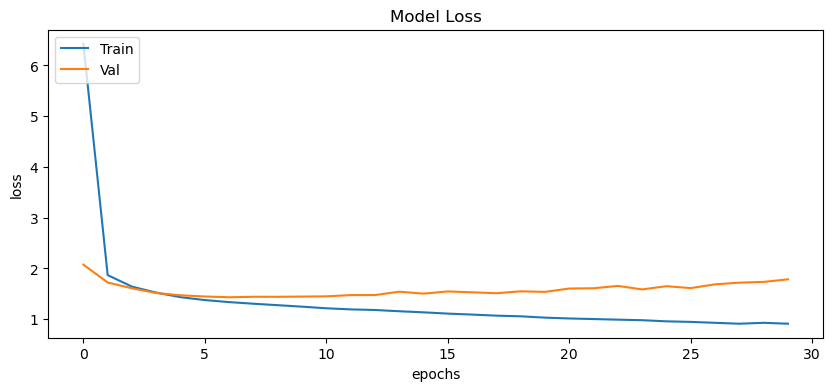

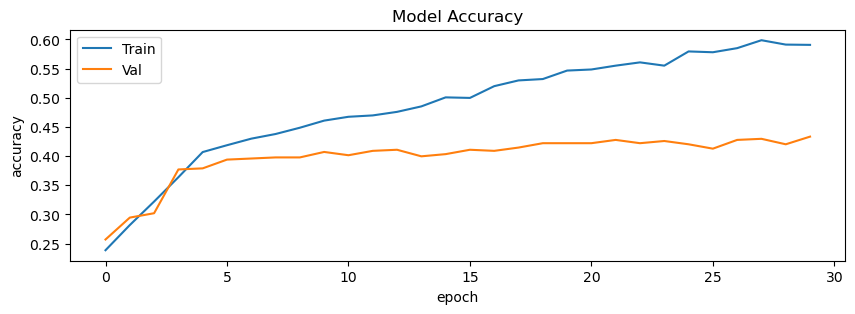

In [30]:
visualize_results(history)

We can see from the learning curves that the model slowly converges and that the model therefore is underfitting. Both the training and validation accuracy curves plateau at a low value, indicating that the model is not learning the patterns in the data well enough 🗿

### Make predictions on the test dataset

1/1 [==============================] - 0s 8ms/step


2023-03-16 15:36:29.549993: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 8ms/step


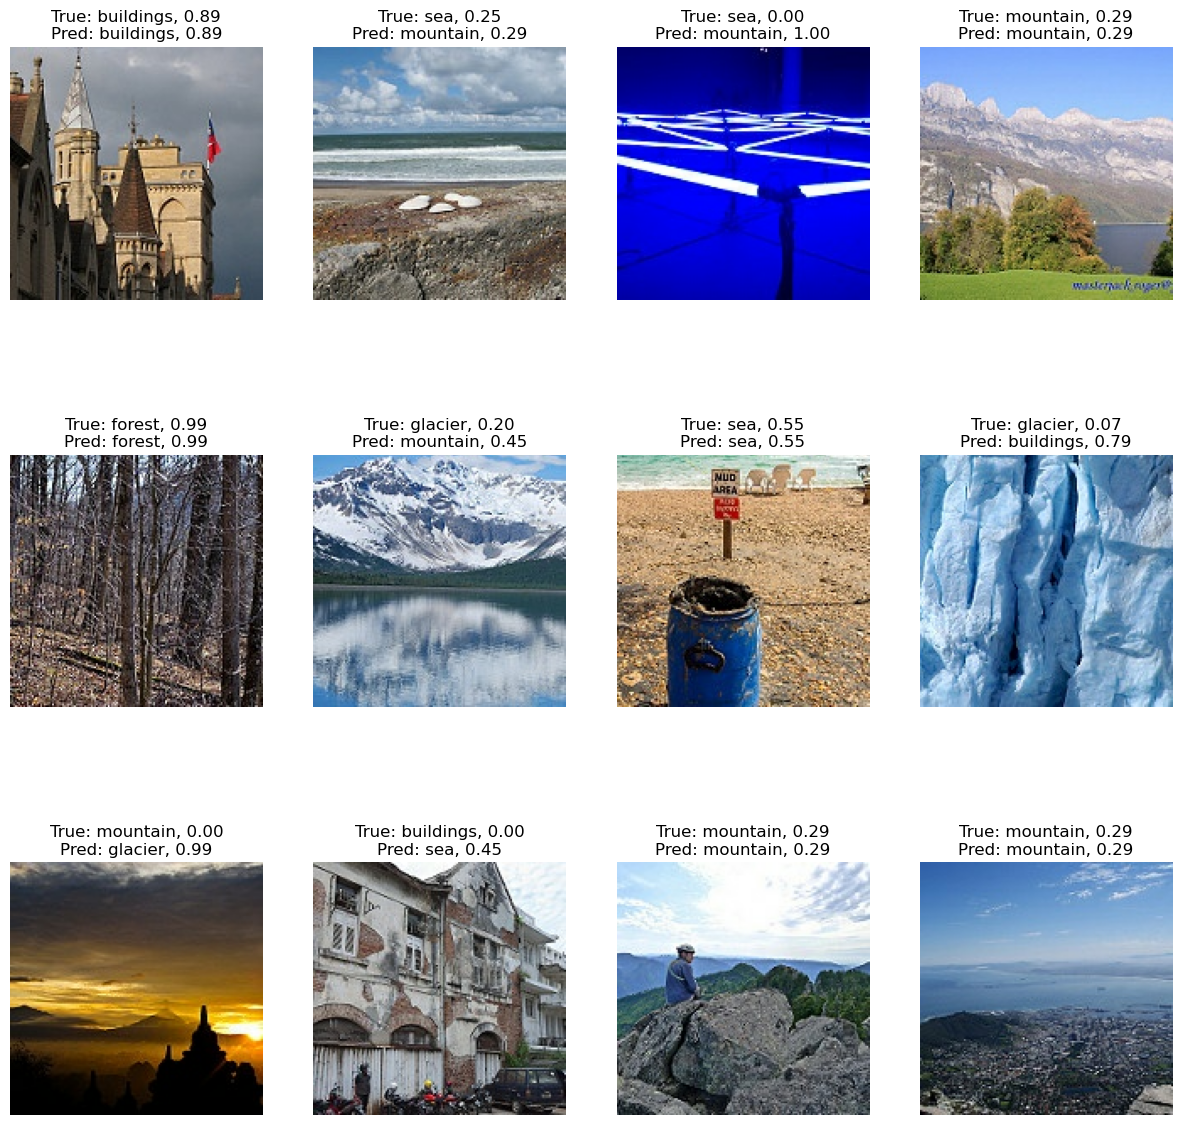

In [31]:
show_images_with_predictions(model_underfitting)

## Evaluate the performance of the model

In [32]:
print(f'Accuracy: {model_underfitting.evaluate(test_ds)[1]}')

79/79 [==============================] - 0s 6ms/step - loss: 1.8681 - accuracy: 0.4158
Accuracy: 0.41576629877090454


## Confusion Matrix
The confusion matrix is another way to visualize the performance of the model and whether it is underfitting or not.

1/1 [==============================] - 0s 21ms/step


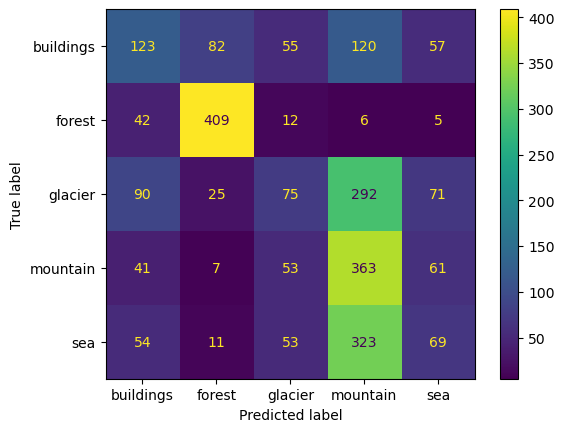

In [33]:
true_labels, pred_labels = show_confusion_matrix(model_underfitting)

We noticed that the underfitting model tries to stick to one class for the most part (vertical line in the matrix). We suspect the reason for this being the amount of images assigned to that class in the training set. The classifier knows one class best and tries to match the most images to this class as well. Depending on who ran the notebook, it might be a different class the classifier tries to stick to, as we deleted images of the dataset manually, resulting in different class sizes per person.

![Training Set Class Sizes](training-set-class-sizes.png "Training Set Class Sizes")

## Classification Report

In [34]:
print('Classification Report:\n', metrics.classification_report(y_true=true_labels, y_pred=pred_labels))

Classification Report:
               precision    recall  f1-score   support

           0       0.35      0.28      0.31       437
           1       0.77      0.86      0.81       474
           2       0.30      0.14      0.19       553
           3       0.33      0.69      0.45       525
           4       0.26      0.14      0.18       510

    accuracy                           0.42      2499
   macro avg       0.40      0.42      0.39      2499
weighted avg       0.40      0.42      0.38      2499



The classification report shows precision, recall, f1-score and support. Looking at the classification report above, for our underfitting model, we can see it is pretty bad. With a precision (proportion of true positive (TP) predictions among all positive predictions) rate low for all classes, same with the recall score (proportion of TP among all TP and FP), resulting in a low f1-score (mean of precision and recall), it means the model is not good enough for our task.

Support is the number of actual occurrences (images) of a class in the specified dataset. Unbalanced support in the training data may indicate structural weaknesses in the reported results of the classifier and could mean that stratified sampling or rebalancing is needed, which might be the case with our dataset in combination with a weak model like this (see confusion matrix above, last part).

# Overfitting Model
This model will be too complex and will adapt perfectly on the training images but will perform poorly on the test data.

The learning curve of the overfitting model will show that the accuracy on the training set is high and improving over time, while the accuracy on the validation set is lower and plateauing or even decreasing over time.

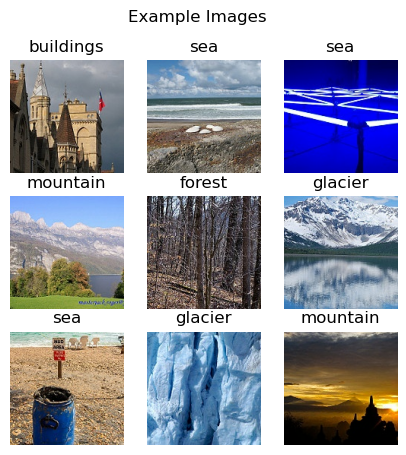

In [35]:
show_images("Example Images", augment=False)

## Building the Model
The SparseCategoricalCrossentropy calculates the loss of a categorical model with labels provided as integer values. 

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

def create_model_overfitting():
    model = Sequential()

    model.add(Conv2D(32, (3,3), input_shape= (img_size,img_size,3), activation = 'relu', padding = 'same')) #padding = same size output
    model.add(MaxPooling2D())

    model.add(Conv2D(64, (3,3), activation = 'relu', padding = 'same'))
    model.add(MaxPooling2D())

    model.add(Conv2D(128, (3,3), activation = 'relu', padding = 'same')) 
    model.add(MaxPooling2D())

    model.add(Conv2D(256, (3,3), activation = 'relu', padding = 'same')) 
    model.add(MaxPooling2D())

    model.add(Conv2D(512, (3,3), activation = 'relu', padding = 'same')) 
    model.add(MaxPooling2D())

    model.add(Flatten())

    model.add(Dense(256, activation='relu'))
    model.add(Dense(5, activation = 'softmax'))

    model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    model._name = "overfitting_model"

    return model

In [37]:
overfitting_model = create_model_overfitting()
overfitting_model.summary()

Model: "overfitting_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 18, 18, 128)

Having this many trainable parameters means the model will be able to adapt i.e. fit to the training data much better than the underfitting model ever could.

## Training the Model
Learnings: In each epoch all images are sent into the CNN and through backpropagation the weights get adapted. The output of the `model.fit()` process outputs e.g.
```
Epoch 1/20
35/163 [==============================]
```
which indicates that the CNN is currently training the 35th batch of 162 batches of the first epoch. If we use a batch_size of 32 we can then calculate the number of images included in the training step: $$163*32=5216$$
The number of epochs defines how many times the CNN sees the **entire** dataset but in a different order.

Another outcome that we've encountered is that the `model.fit()` process needs at least 30 epochs to converge sufficiently so that the overfitting phenomenon is visible in the loss and accuracy graph.

In [38]:
history = overfitting_model.fit(
    train_ds, 
    validation_data=val_ds,
    epochs=30,
)

Epoch 1/30
 1/67 [..............................] - ETA: 21s - loss: 14.3806 - accuracy: 0.2500

2023-03-16 15:36:32.868279: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


67/67 [==============================] - ETA: 0s - loss: 6.6520 - accuracy: 0.4477

2023-03-16 15:36:36.096860: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


67/67 [==============================] - 4s 52ms/step - loss: 6.6520 - accuracy: 0.4477 - val_loss: 1.0269 - val_accuracy: 0.5478
Epoch 2/30
67/67 [==============================] - 3s 47ms/step - loss: 1.0003 - accuracy: 0.5856 - val_loss: 0.9764 - val_accuracy: 0.5797
Epoch 3/30
67/67 [==============================] - 3s 47ms/step - loss: 0.9014 - accuracy: 0.6320 - val_loss: 0.9085 - val_accuracy: 0.6304
Epoch 4/30
67/67 [==============================] - 3s 47ms/step - loss: 0.7629 - accuracy: 0.6920 - val_loss: 0.7554 - val_accuracy: 0.6942
Epoch 5/30
67/67 [==============================] - 3s 48ms/step - loss: 0.7119 - accuracy: 0.7121 - val_loss: 0.7316 - val_accuracy: 0.7148
Epoch 6/30
67/67 [==============================] - 3s 47ms/step - loss: 0.5856 - accuracy: 0.7853 - val_loss: 0.7405 - val_accuracy: 0.7486
Epoch 7/30
67/67 [==============================] - 3s 47ms/step - loss: 0.5253 - accuracy: 0.7965 - val_loss: 0.6296 - val_accuracy: 0.7936
Epoch 8/30
67/67 [======

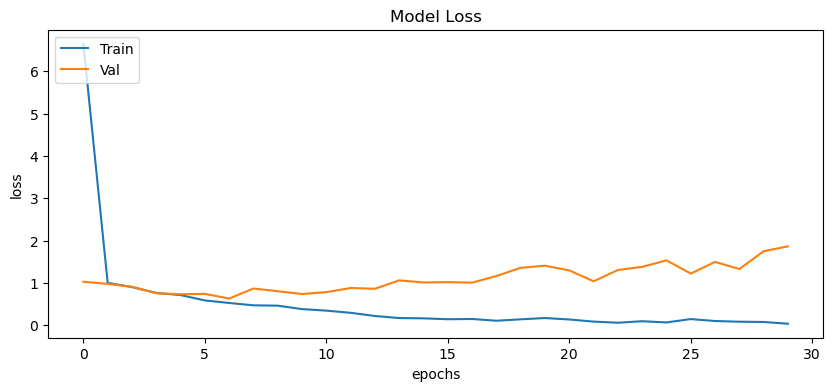

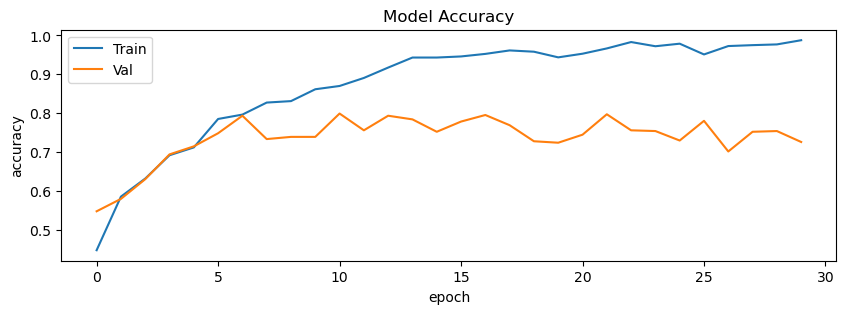

In [39]:
visualize_results(history)

The accuracy graph makes visible that the test accuracy will come really close or actually is 1 during the training phase. That means the classifier has adapted itself very well to the training dataset. Which also means it has adapted itself very well to the noise. 

The validation dataset contains pictures that the classifier has not seen before, and as the model fits too much to the training data, it cannot predict the classes of the validation data well enough. The loss graph shows the same phenomenon. In that case, the validation loss increases, while the training loss decreases.

In [40]:
overfitting_model.evaluate(test_ds)

79/79 [==============================] - 1s 18ms/step - loss: 1.7061 - accuracy: 0.7335


[1.7060673236846924, 0.7334933876991272]

Again the model does not perform as well on new data (this time the testing dataset) as it performed on the training data.

1/1 [==============================] - ETA: 0s

2023-03-16 15:38:11.219544: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 10ms/step


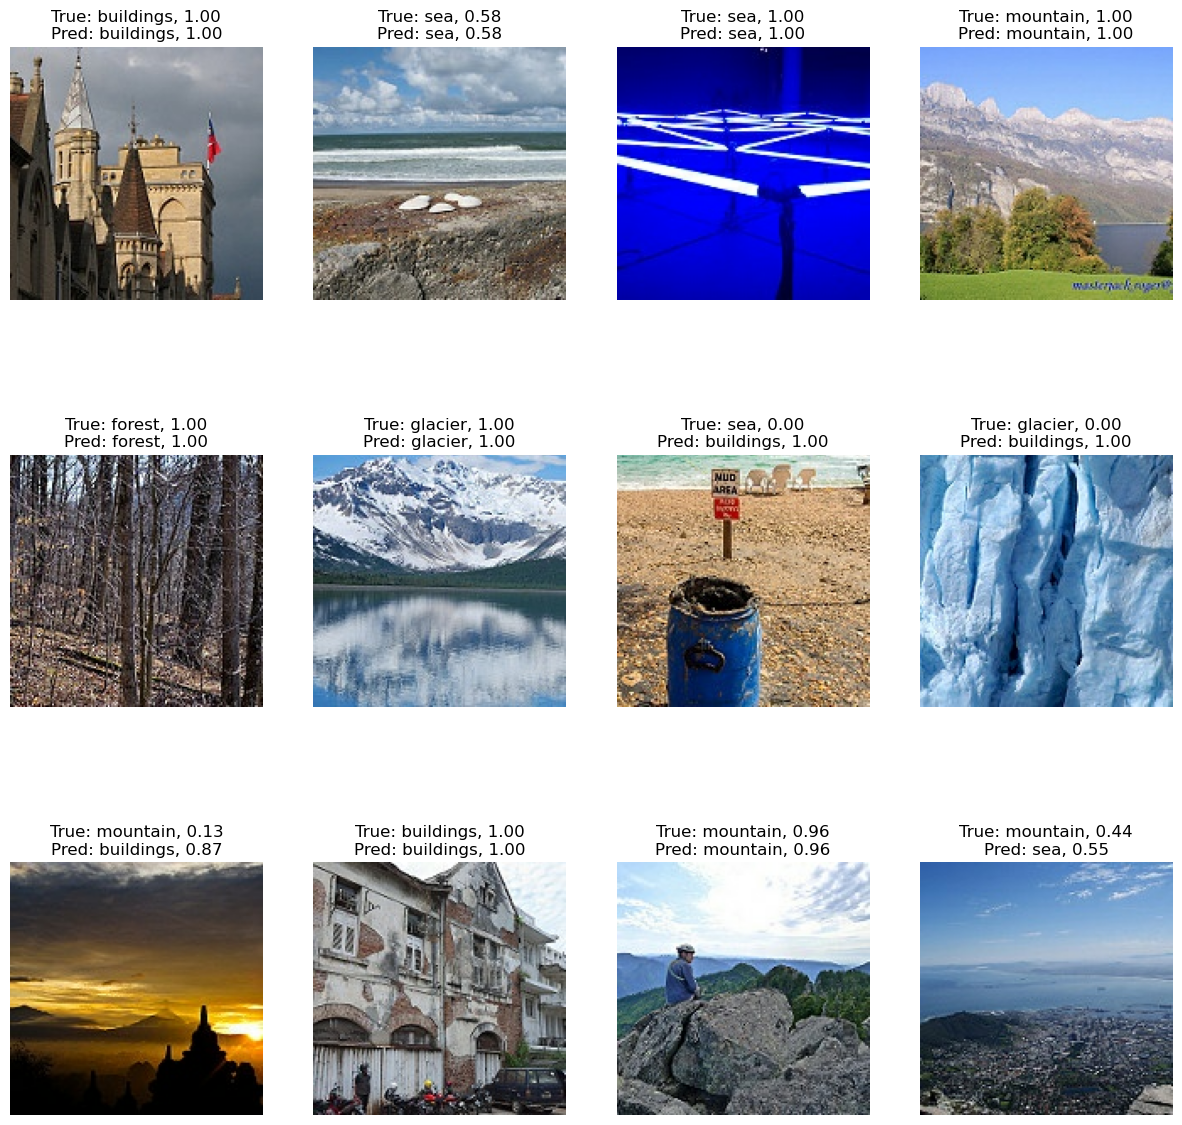

In [41]:
show_images_with_predictions(overfitting_model)

Unlike the underfitting model, the overfitting model is occasionally 100% sure an image will belong to a certain class. Which is sometimes true, sometimes not (visualized above for the test dataset).

# Optimized Model
This model does not show under- or overfitting and performs well on both, training and testing data. Afterwards, a brief description on how to tackle the challenges of an optimal model complexity. 

To address underfitting, one approach is to increase the complexity of the model by adding more layers or increasing the number of filters in each layer.

To address overfitting, we can try several approaches. One approach is to simplify the model by removing some layers or decreasing the number of filters in each layer. Another approach is to use less epochs for example (which not always the best approach to be fair).

Adding dropout or weight decay can help to address both of the above mentioned issues. We can also try adjusting the hyperparameters such as learning rate, batch size, or number of epochs.

## GPU Acceleration
We found out that training a model on images can be a very time consuming task, especially if many images are involved. Randomly we stumbled upon an article that stated about "GPU Acceleration" which sounded pretty interesting. Afterwards, we read a bit about the topic and found out that it is possible on our Apple M1 Pro / M2 Pro chips. After a lot of trial and error we ended up using the tensorflow-macos and tensorflow-metal packages but with specific versions because the newest versions did not work. With the both packages installed correctly, both the CPU and GPU are being used for training. The CPU on the M2 Pro chip has 12 cores and its GPU has 19 cores. The total of 31 cores over 12 cores already indicates that usage of the GPU would lead to massive performance improvements. The following image shows the CPU and GPU usage during training of the optimized model:

![GPU Acceleration](gpu-acceleration.png "GPU Acceleration")

When we were utilizing the CPU only, training took ~100s per epoch for the overfitting model (there were ~11'000'000 trainable parameters, our overfitting model has changed since). After enabling GPU acceleration we came down to astonishing ~10s per epoch. This factor of 10 improvement was even more than we hoped for and enabled us to test more parameters, because training took about 2 minutes instead of the usual 20 minutes.

## Data Augmentation
Data Augmentation has proven to be a useful tool for model generalization. We've compared the same model with and without data augmentation and the results show that the model without data augmentation tends to overfit while the model with data augmentation doesn't:

![Data Augmentation Result](comparison-data-agumentation.jpg "Data Augmentation Result")

The reason for this is that data augmentation reduces the generalization error. It introduces new samples to the dataset, by rotating, zooming, and otherwise altering existing images. This increases the size of the dataset, forces the model to learn features of the dataset in a different way, and thus reduces the model's tendency to overfit (more on that later).

During this project we've also encountered some downsides of data augmentation. One apparent downside is that it drastically slows down the training because the images are being preprocessed and the amount of data increases. Because of this reason, we've turned off data augmentation for the KFold Cross Validation.

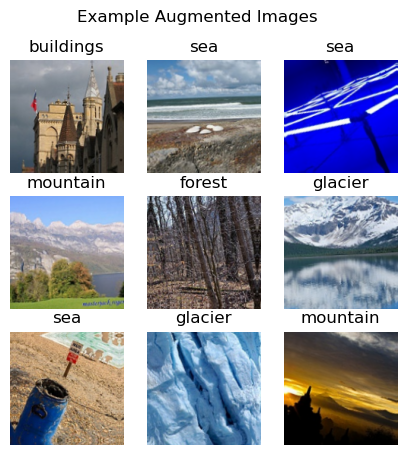

In [42]:
show_images("Augmented Images (flipped, rotated, zoomed)", augment=True)

## Building the Model
As a baseline we used the same model as the overfitting one but we add some extras to reduce the overfitting behavior.

### Regularization
Regularization is used to reduce the impact impact of the weights. The weights then end up having less impact on the loss function which determines the error between the actual label and predicted label. This reduces complexity of the model and therefore reduces overfitting. We are adding the same regularization parameter to all of the Conv2D layers. We are using L2 (Ridge) regularization since it predetermined from the task. 

#### Dropout Layers
The benefit of using dropout is, as mentioned earlier, that no node in the network will be assigned with high parameter values, as a a result the parameter values will be dependent on multiple nodes of the previous' layer, but instead each node of the previous layer forwards robust and standalone information.
E.g. `dropout(0.2)` turns off the nodes of a layer (sets their weights to 0) at a probability of 0.2. Dropout is applied per batch size, so the parameters get tuned for a full batch size with missing input parameters which results in a lower generalization error. Therefore, optimizing dropout parameters along with batch size would make sense for parameter optimizing using KFold Cross Validation. The results of this experiment can be found below under the topic "Batch Size".

### Generalization
To improve generalization of the model, data augmentation is a useful tool. With data augmentation we can add artificial effects to the images such as flipping and rotating. Through these effects, the images always appear differently each time they are being used in a training step. Therefore the CNN doesn't adapt to the exact images, but rather learns about the relative features inside of an image.

### Optimizer
For the optimized model we chose Adam over the competitors because it is the most common among Stochastic Gradient Descent (SGD). We tried out SGD itself, but it performed poorly compared to Adam. Adam optimization is a SGD method that is based on adaptive estimation of first-order (mean) and second-order (uncentered variance) moments. Its default implementation already provides a form of annealed learning, beta_1=0.9 for the first-order moment and beta_2=0.999 for the second-order moment. 

### Activation Function
The [following article](https://thangasami.medium.com/cnn-and-ann-performance-with-different-activation-functions-like-relu-selu-elu-sigmoid-gelu-etc-c542dd3b1365) states that ReLU is the overall the best suited activation function so based on this we decided to use ReLU for our optimized model. In general, non-saturated activation functions tend to be more efficient than saturated activation functions.

### Batch Size
The batch size defines how many samples (in our case images) run through the neural network before the weights get adapted. It is recommended to use mini batches to update the neural network multiple times during an epoch. We've tried out differnt batch sizes with the same seed on the image generator. To find the optimal batch size we've used the KFold Cross Validation method to see which combination of dropout and batch size works the best. For the dropout parameter we tried out the values 0.1, 0.2 and 0.3 whereas for the batch size we tried out 16, 32 and 128.

In a first run we obtained the following values:

![Batch size & Dropout](history-data/dropout-batch_size-5fold-cv.png "Batch size & Dropout")

On a first sight it wasn't clear which parameter is the best. But one thing that was clear is that the loss for dropout=0.3 is always the smallest so we used this parameter to test again for the different batch sizes and got the following diagram: 

![Batch size & Dropout 2](history-data/batch_size-5fold-cv.png "Batch size & Dropout 2")

We also analyzed the training convergence of the three batch sizes:

![Batch size & Dropout 3](history-data/batch_size-5fold-cv-lineplot.png "Batch size & Dropout 3")

With all those considerations we did not find an ideal parameter and would need to make more tests in order to find an ideal parameter. But for the sake of this project we took a batch size of 16 paired with a dropout of 30%. 

## Layers
### First Layer
The RGB channel values are in the [0, 255] range. This is not ideal for a neural network because in general, the input values should be small. Therefore, we use the `BatchNormalization` layer as a normalization layer. 

### Dropout
With Cross-Validation we've tried out different dropout params (0.2, 0.3, 0.4) for the layer before the dense layers. The results are pretty similar but the 0.3 dropout seems to be more stable at the end of 30 epochs so we used this parameter for the model. The steep spikes of accuracy in the first few epochs are expected because due to dropout, some parameters are missing everytime and the model improves a lot over a short period of time because other parameters are being dropped out at every epoch.

![Last Layer Dropout](history-data/dropout-param-5fold-cv.png "Last Layer Dropout")

### Last Layer
For the last layer we tried out 512, 1024 and 2048 trainable parameters and the Cross-Validation result was that the accuracy and loss were not drastically affected, but the network with 2048 parameters in the last layer was much more stable than the others. Based on this fact, we sticked with using 2048 parameters in the last layer.

![CV Last Layer](history-data/last-layer-param-5fold-cv.png "CV Last Layer")

### Loss Function
Because we use the SoftMax activation function as the output of the last Dense Layer, we get normalized probabilites, [0, 1]. The SparseCategoricalCrossentry function's from_logits=True would expect Logits which are in the range of [-inf, +inf] and therefore, we use `from_logits=False`.

As the optimizer, we also tried out SGD with annealed learning but in the course of 20 epochs we reached poorer results than with adam.

To speed up the training with KFold Cross Validation, we've introduced a parameter to turn off data augmentation and another parameter to use more parameters since they seriously slow down training, which affects Cross Validation too much.

In [55]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.regularizers import l2

def create_model_optimized(l2_param=0.001, dropout_param=0.3, last_layer_param=512, augment=True, weight_factor=1, batch_size=16):
    model = Sequential()

    import_models(batch_size)

    if augment:
        model.add(data_augmentation)
    model.add(BatchNormalization(input_shape= (img_size,img_size, 3)))

    model.add(Conv2D(32 * weight_factor, (3,3), activation = 'relu', padding = 'same'))
    model.add(MaxPooling2D())
    model.add(Dropout(dropout_param))

    model.add(Conv2D(64 * weight_factor, (3,3), activation = 'relu', padding = 'same', kernel_regularizer=l2(l=l2_param)))
    model.add(MaxPooling2D())
    model.add(Dropout(dropout_param))

    model.add(Conv2D(128 * weight_factor, (3,3), activation = 'relu', padding = 'same', kernel_regularizer=l2(l=l2_param))) 
    model.add(MaxPooling2D())
    model.add(Dropout(dropout_param))

    model.add(Conv2D(256 * weight_factor, (3,3), activation = 'relu', padding = 'same', kernel_regularizer=l2(l=l2_param))) 
    model.add(MaxPooling2D())
    model.add(Dropout(dropout_param))

    model.add(Conv2D(last_layer_param * weight_factor, (3,3), activation = 'relu', padding = 'same', kernel_regularizer=l2(l=l2_param))) 
    model.add(MaxPooling2D())
    model.add(Dropout(0.4))

    model.add(Flatten())

    model.add(Dense(256, activation='relu'))
    model.add(Dense(5, activation = 'softmax'))

    model.compile(
       optimizer = 'adam', 
       loss=SparseCategoricalCrossentropy(from_logits=False), 
       metrics=['accuracy']
    )

    return model

## Cross Validation for Parameter Optimization
For k-fold Cross Validation parameter optimization we are using a sklearn's KFold method paired with a custom functionality to fit the model with different parameter values. We tried to use GridSearchCV (as we did in the AI Foundation course) but we first thought that the model parameters (such as the regularization parameter of the 2nd Conv2D layer) are not accessible from the `param_grid` that is passed to GridSearchCV (which we later found out is not the case). We then came up with a custom KFold Cross Validation approach which is fully flexible and uses if-else statements in the model creation step. With this Cross Validation implementation we've tuned parameters such as the l2 regularization paramter, the number of trainable parameters in the last Conv2D layer or the percentage of dropout before the dense layers.

The following image visualizes the results of the l2 regularization parameter. We tested for the values 0.01, 0.001 and 0.0001 and ran a 5-fold Cross Validation with 10 epochs for each value. The regularizer is being used in three Conv2D layers of the model. As from the diagram below it is apparent that the accuracy improved the smaller the l2 regularization parameter was, and therefore, we decided to use l2=0.0001.

![l2 Parameter Optimization](history-data/l2-param-5fold-cv.png "l2 Parameter Optimization")

### Development of the kFold CV Functionality
The part of splitting the full dataset into testing and validation data by the indices obtained by the KFold split was pretty tricky. We've encountered that it is not always convenient and easy to handle the tensorflow data. Especially without experience of the huge framework it was difficult to find information about splitting a dataset and we ended up trying out numerous ways. In the end we consulted ChatGPT which lead us in the right direction. One problem we've had is that the generated filtering functionality did not work directly and after reading the documentation of the filter method, it was not clear which parameters are being passed to this function. Also, it is surprising that tensorflow doesn't seem to have an out-of-the-box solution for such a dataset split. In the end we found out how the methods works and the implementation was successful.

The current solution is not optimal because the `.filter(... reduce_any(...))` is not performant and massively slows down the training which would be important to improve in a real project. Nevertheless, the implementation works and enabled us to make sophisticated comparisons of the model parameters. 

During the usage of the intense training functionality of KFold Cross Validation we encountered a problem using tensorflow-metal with GPU acceleration. The problem is that the python process hangs up after approximately the 8-th fold of a 10 epoch training process. This was very inconvenient because we were not able to perform the parameter optimization in one step and needed to temporarily store the results for each parameter which we made by saving the results in a JSON file. Luckily, we were able to perform the 5-fold Cross Validation of at least one parameter before the process hung up. The issue of this behavior is known but does not seem to be fixed yet, as can be seen [here]( https://developer.apple.com/forums/thread/713944). 

As already mentioned, we've turned off data augmentation for Cross Validation in favor of performance.

In [56]:
import itertools
from sklearn.model_selection import KFold
import tensorflow as tf
import json

param_grid=dict(
    # last_layer_param=[512, 1024, 2048]
    l2_param=[0.01, 0.001, 0.0001],
    augment=[False],
    # dropout_param=[0.2, 0.3, 0.4]
    # batch_size=[16, 32, 128],
)
epochs = 30
folds = 5

keys = list(param_grid.keys())
params = list(param_grid.get(x) for x in keys)
param_permutations = list(itertools.product(*params))

model_history = dict()

kfold = KFold(n_splits=folds, shuffle=True)

for perm in param_permutations:
    model_args = dict()
    for index in range(len(params)):
        key = keys[index]
        value = perm[index]
        model_args[key] = value

    # Set title according to the params for later visualization
    title = ", ".join(list((key + ": " + str(model_args[key])) for key in model_args.keys()))
    
    print("CURRENTLY TRAINING THE MODEL WITH THE FOLLOWING PARAMS: " + title)
    model_history[title] = []

    for fold, (train_indices, val_indices) in enumerate(kfold.split(train_images)):
        print(f'Fold {fold+1}/{folds}, (params={title})')

        X_train, y_train = train_images[train_indices], train_labels[train_indices]
        X_val, y_val = train_images[val_indices], train_labels[val_indices]

        model = create_model_optimized(**model_args)
        
        history = model.fit(
            X_train,
            y_train,
            validation_data=(X_val, y_val),
            epochs=epochs
        )

        # Evaluate the model on the validation dataset for this fold
        loss, acc = model.evaluate(test_ds)
        print(f'Test accuracy: {acc:.3f}\n')

        # Use title as key for easy usage
        model_history[title].append(dict(fold=fold, loss=loss, acc=acc, history=history))

    with open(f'model-history-{title}.json', 'w') as f:
        json.dump(model_history, f, default=lambda o: '<not serializable>')

CURRENTLY TRAINING THE MODEL WITH THE FOLLOWING PARAMS: l2_param: 0.01, augment: False
Fold 1/5, (params=l2_param: 0.01, augment: False)
Epoch 1/30


2023-03-16 16:14:22.457931: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


67/67 [==============================] - ETA: 0s - loss: 7.2267 - accuracy: 0.3616

2023-03-16 16:14:34.776790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


67/67 [==============================] - 14s 181ms/step - loss: 7.2267 - accuracy: 0.3616 - val_loss: 3.7253 - val_accuracy: 0.3633
Epoch 2/30
67/67 [==============================] - 10s 147ms/step - loss: 2.4480 - accuracy: 0.5338 - val_loss: 1.7290 - val_accuracy: 0.6086
Epoch 3/30
67/67 [==============================] - 9s 141ms/step - loss: 1.5015 - accuracy: 0.5821 - val_loss: 1.2310 - val_accuracy: 0.6330
Epoch 4/30
67/67 [==============================] - 10s 142ms/step - loss: 1.2277 - accuracy: 0.5966 - val_loss: 1.0792 - val_accuracy: 0.6667
Epoch 5/30
67/67 [==============================] - 9s 142ms/step - loss: 1.0382 - accuracy: 0.6318 - val_loss: 0.9685 - val_accuracy: 0.6498
Epoch 6/30
67/67 [==============================] - 10s 143ms/step - loss: 0.9858 - accuracy: 0.6313 - val_loss: 0.9453 - val_accuracy: 0.6442
Epoch 7/30
67/67 [==============================] - 10s 143ms/step - loss: 0.9381 - accuracy: 0.6506 - val_loss: 0.8974 - val_accuracy: 0.6873
Epoch 8/30
6

KeyboardInterrupt: 

### Visualizaton of the Parameter Performance

{'l2_param: 0.01, augment: False': [{'fold': 0, 'loss': 1.8036718368530273, 'acc': 0.7699079513549805, 'history': <keras.callbacks.History object at 0x4d029f8e0>}, {'fold': 1, 'loss': 2.0383594036102295, 'acc': 0.7539015412330627, 'history': <keras.callbacks.History object at 0x4cb2c1bd0>}, {'fold': 2, 'loss': 1.7577335834503174, 'acc': 0.808723509311676, 'history': <keras.callbacks.History object at 0x2bdc3b160>}, {'fold': 3, 'loss': 1.541614055633545, 'acc': 0.7939175367355347, 'history': <keras.callbacks.History object at 0x32ca87040>}, {'fold': 4, 'loss': 1.505004644393921, 'acc': 0.7651060223579407, 'history': <keras.callbacks.History object at 0x29d3d3940>}], 'l2_param: 0.001, augment: False': [{'fold': 0, 'loss': 1.0471765995025635, 'acc': 0.7975190281867981, 'history': <keras.callbacks.History object at 0x37f9a3a30>}, {'fold': 1, 'loss': 1.0243520736694336, 'acc': 0.8071228265762329, 'history': <keras.callbacks.History object at 0x15108aa40>}, {'fold': 2, 'loss': 1.134815573692

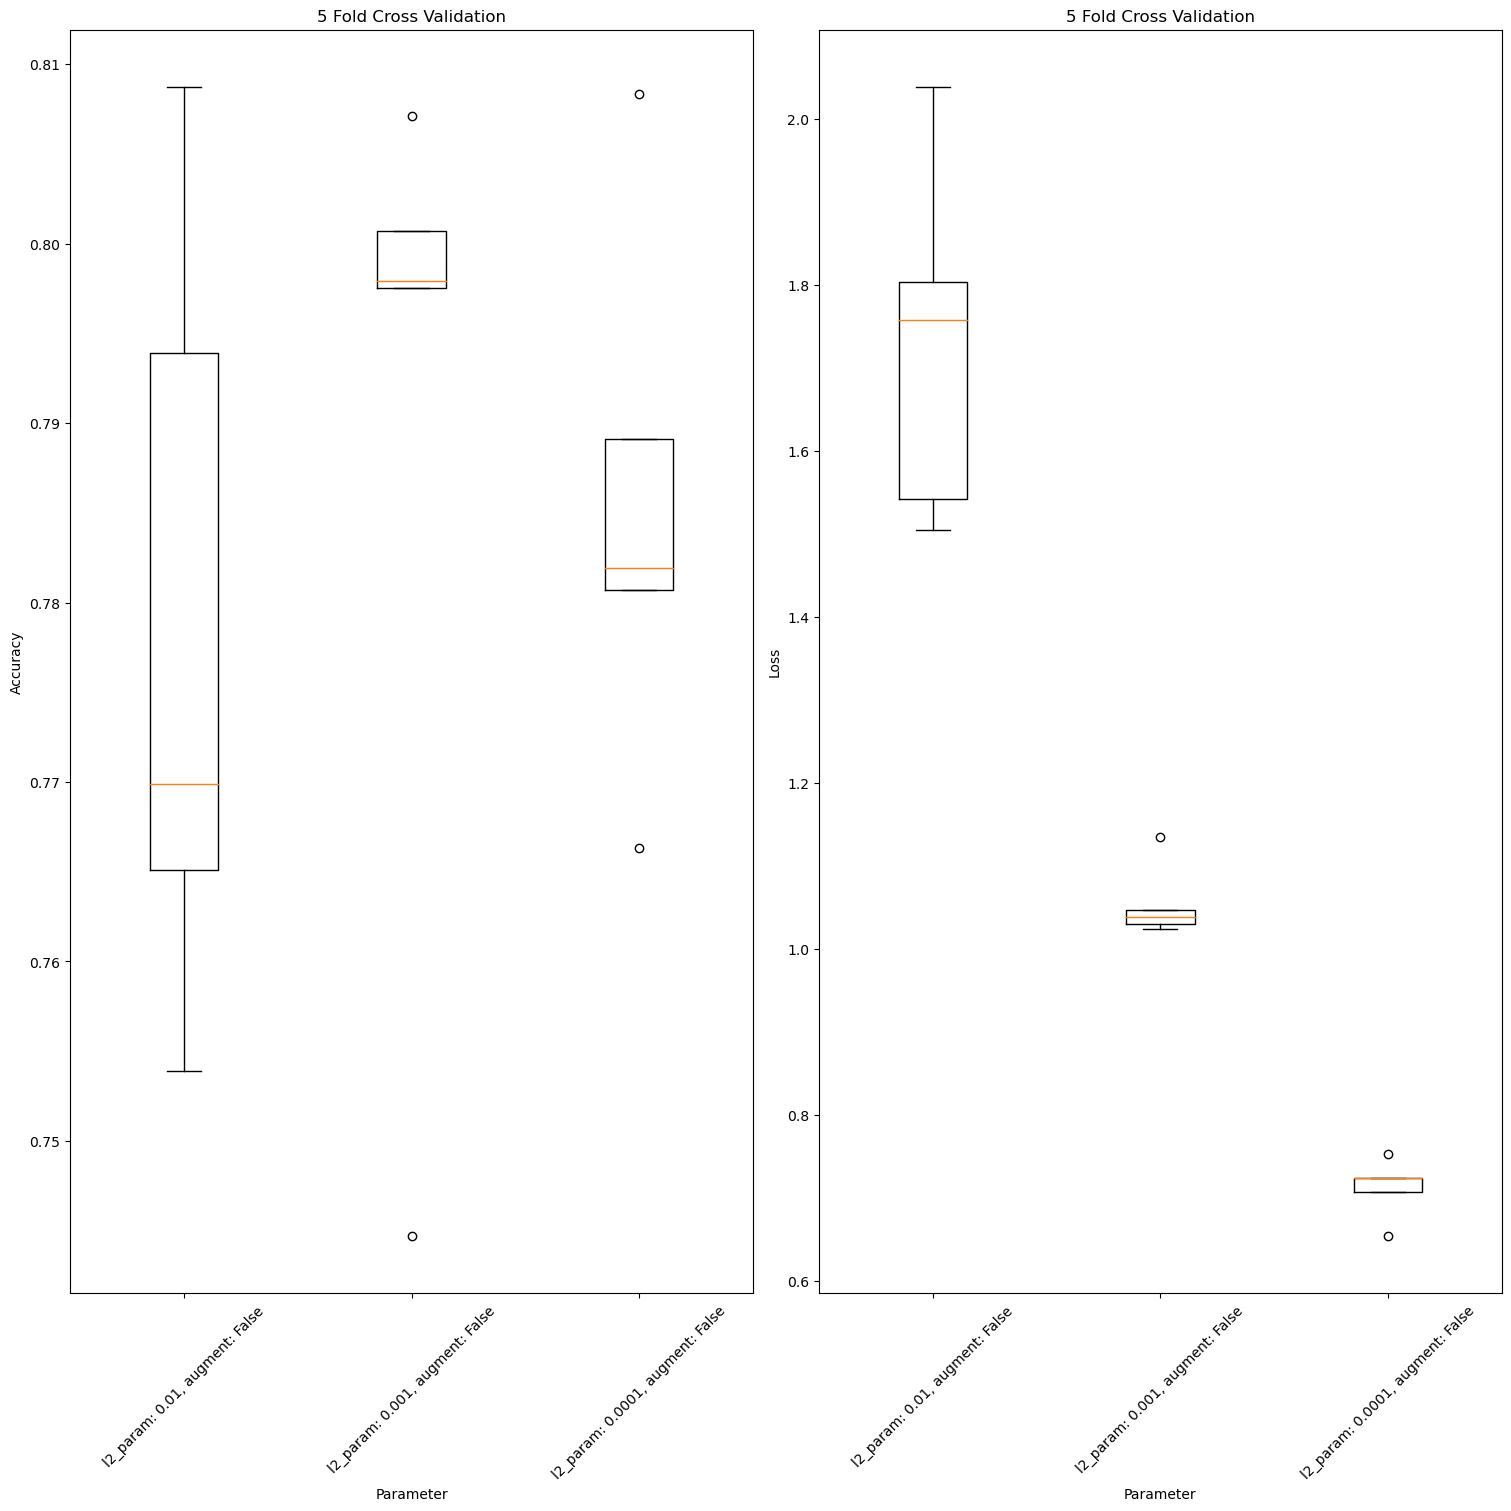

In [52]:
# The following data has been generated with the above custom KFold Cross Validation method
#model_history = {
#    "last_layer_param: 512": [{"fold": 0, "loss": 0.9580041766166687, "acc": 0.6450580358505249}, {"fold": 1, "loss": 0.8243932127952576, "acc": 0.685874342918396}, {"fold": 2, "loss": 1.3444817066192627, "acc": 0.5246098637580872}, {"fold": 3, "loss": 0.9893543124198914, "acc": 0.6194477677345276}, {"fold": 4, "loss": 0.8950880169868469, "acc": 0.6618647575378418}],
#    "last_layer_param: 1024": [{"fold": 0, "loss": 1.002255916595459, "acc": 0.6302521228790283}, {"fold": 1, "loss": 1.0927249193191528, "acc": 0.5918367505073547}, {"fold": 2, "loss": 1.0004750490188599, "acc": 0.6314525604248047}, {"fold": 3, "loss": 0.9172393679618835, "acc": 0.6574629545211792}, {"fold": 4, "loss": 1.024383306503296, "acc": 0.6054421663284302}],
#    "last_layer_param: 2048": [{"fold": 0, "loss": 1.1013964414596558, "acc": 0.5674269795417786}, {"fold": 1, "loss": 0.9457604289054871, "acc": 0.6214485764503479}, {"fold": 2, "loss": 1.1457700729370117, "acc": 0.5774309635162354}, {"fold": 3, "loss": 0.8856483101844788, "acc": 0.6426570415496826}, {"fold": 4, "loss": 0.9397972822189331, "acc": 0.6210483908653259}]
#}
print(model_history)
accuracies = dict()
losses = dict()
for key in model_history.keys():
    accuracies[key] = []
    losses[key] = []
    for entry in model_history[key]:
        losses[key].append(entry["loss"])
        accuracies[key].append(entry["acc"])

fig, ax = plt.subplots(1, 2, constrained_layout=True)
ax[0].set_title("5 Fold Cross Validation")
ax[0].set_ylabel("Accuracy")
ax[0].set_xlabel("Parameter")
ax[0].boxplot(accuracies.values())
ax[0].set_xticklabels(accuracies.keys(), rotation=45)
ax[1].set_title("5 Fold Cross Validation")
ax[1].set_ylabel("Loss")
ax[1].set_xlabel("Parameter")
ax[1].boxplot(losses.values())
ax[1].set_xticklabels(losses.keys(), rotation=45)

fig.set_figheight(15)
fig.set_figwidth(15)

#### Visualization of the Test Accuracy for each Fold

In [ ]:
for m_key in model_history:
    for item in model_history.get(m_key):
        for key in item:
            if key == 'history':
                history = item.get('history')
                fold = item.get("fold")
                plt.plot(history.history['val_accuracy'], label=f"Fold {fold}")
    plt.title(f"Accuracies for {folds} Fold CV, with {m_key}")
    plt.ylabel("Test Accuracy")
    plt.xlabel("Epochs")
    plt.legend(loc= 'upper left')
    plt.show()

#### Visualization of the Training Convergence

In [ ]:
for m_key in model_history:
    accuracies = []
    losses = []
    for item in model_history.get(m_key):
        for key in item:
            if key == 'history':
                history = item.get('history')
                fold = item.get("fold")
                accuracies.append(history.history['val_accuracy'])
                losses.append(history.history['val_loss'])
    avg_acc = np.average(np.array(accuracies), axis=0)
    avg_loss = np.average(np.array(losses), axis=0)
    line = plt.plot(avg_acc, label=m_key)
    plt.plot(avg_loss, c=line[0].get_color())

plt.ylim(0.4, 1)
plt.title(f"Validation Accuracies and Losses for {folds} Fold CV")
plt.ylabel("Validation Accuracy")
plt.xlabel("Epochs")
plt.legend(loc= 'lower right')
plt.show()

### Update with GridSearchCV
Apparently, the first belief that the model parameters can't be optimized using GridSearchCV, was a misperception, because `model.get_params()` would not output the expected parameters... Beause the GridSearchCV implementation does somehow not work with our model, and because of the huge effort, we left the above implementation, but still provide a version using GridSearchCV, which is way more elegant. We believe that it is a bug of GridSearchCV that our model doesn't work with the function, because the accuaracy does not improve at all, and if we use less layers, it seems to work. For the details, please look at the [Issue on GitHub](https://github.com/scikit-learn/scikit-learn/issues/25825) which we've created for this behavior. 

To still use GridSearchCV, we've tried another implementation that uses `tf.data.Dataset` directly: [TensorCross](https://github.com/franneck94/TensorCross). Our model works with this implementation, so we provide an example using this method as well. At first, TensorCross was not compatible with tensorflow-macos, which we've also created a [GitHub Issue](https://github.com/franneck94/TensorCross/issues/45) for. That has been fixed very quickly so we were able to use the library. 

In [ ]:
from tensorcross.model_selection import GridSearchCV

param_grid=dict(
    # last_layer_param=[256, 512, 1024],
    l2_param=[0.01, 0.001, 0.0001],
    augment=[False],
    # last_dropout_param=[0.2, 0.3, 0.4]
)
grid_search_cv = GridSearchCV(
    model_fn=create_model_optimized,
    param_grid=param_grid,
    n_folds=5,
)

grid_search_cv.fit(
    dataset=full_train_dataset,
    epochs=30,
)

Epoch 1/20


2023-03-16 09:45:43.676000: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


68/68 [==============================] - ETA: 0s - loss: 12.4861 - accuracy: 0.4266

2023-03-16 09:45:47.625034: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


68/68 [==============================] - 5s 60ms/step - loss: 12.4861 - accuracy: 0.4266 - val_loss: 6.1123 - val_accuracy: 0.5117
Epoch 2/20
68/68 [==============================] - 3s 49ms/step - loss: 5.5066 - accuracy: 0.5766 - val_loss: 5.0894 - val_accuracy: 0.5938
Epoch 3/20
57/68 [========================>.....] - ETA: 0s - loss: 4.8152 - accuracy: 0.6179

KeyboardInterrupt: 

The GridSearchCV prints all the scores as well as the best params which is very convenient:

In [ ]:
grid_search_cv.summary()

## Training the Model
We are now training the model directly with data augmentation to make predictions on the test data and to intereprete its performance.

In [57]:
model_optimized = create_model_optimized(augment=True, weight_factor=2)
model_optimized.summary()

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 150, 150, 3)       0         
                                                                 
 batch_normalization_2 (Batc  (None, 150, 150, 3)      12        
 hNormalization)                                                 
                                                                 
 conv2d_114 (Conv2D)         (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d_114 (MaxPooli  (None, 75, 75, 64)       0         
 ng2D)                                                           
                                                                 
 dropout_109 (Dropout)       (None, 75, 75, 64)        0         
                                                                 
 conv2d_115 (Conv2D)         (None, 75, 75, 128)     

In [65]:
history = model_optimized.fit(train_ds, validation_data=val_ds, epochs=30)

Epoch 1/20
67/67 [==============================] - 15s 222ms/step - loss: 0.5356 - accuracy: 0.8289 - val_loss: 0.5777 - val_accuracy: 0.8386
Epoch 2/20
67/67 [==============================] - 15s 218ms/step - loss: 0.5372 - accuracy: 0.8354 - val_loss: 0.5564 - val_accuracy: 0.8405
Epoch 3/20
67/67 [==============================] - 15s 219ms/step - loss: 0.5311 - accuracy: 0.8467 - val_loss: 0.6039 - val_accuracy: 0.8293
Epoch 4/20
67/67 [==============================] - 15s 220ms/step - loss: 0.5267 - accuracy: 0.8359 - val_loss: 0.5608 - val_accuracy: 0.8349
Epoch 5/20
67/67 [==============================] - 15s 221ms/step - loss: 0.5026 - accuracy: 0.8490 - val_loss: 0.6099 - val_accuracy: 0.8293
Epoch 6/20
67/67 [==============================] - 15s 218ms/step - loss: 0.5333 - accuracy: 0.8350 - val_loss: 0.6825 - val_accuracy: 0.7992
Epoch 7/20
67/67 [==============================] - 15s 219ms/step - loss: 0.4948 - accuracy: 0.8551 - val_loss: 0.7105 - val_accuracy: 0.7880

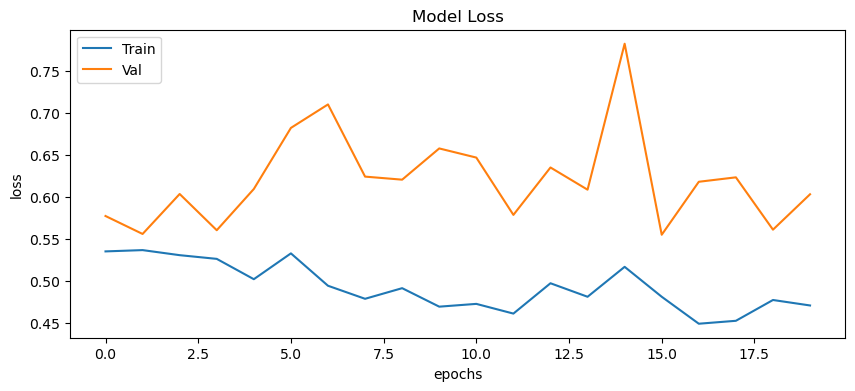

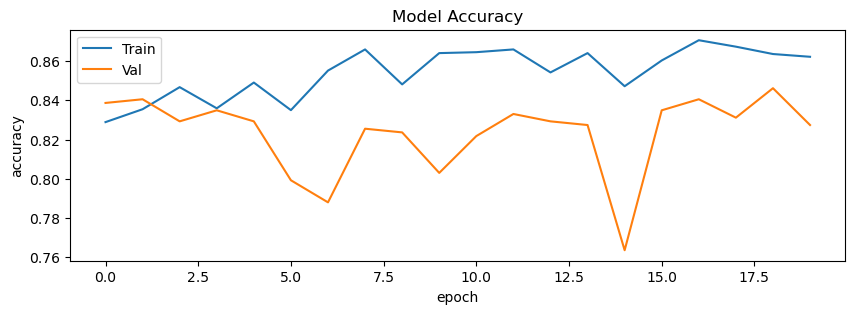

In [66]:
visualize_results(history)

The diagram may look very volatile, but keep in mind the y-axis is scaled.

In [67]:
model_optimized.evaluate(test_ds)

79/79 [==============================] - 3s 39ms/step - loss: 0.6340 - accuracy: 0.8203


[0.633987545967102, 0.8203281164169312]

1/1 [==============================] - 0s 10ms/step


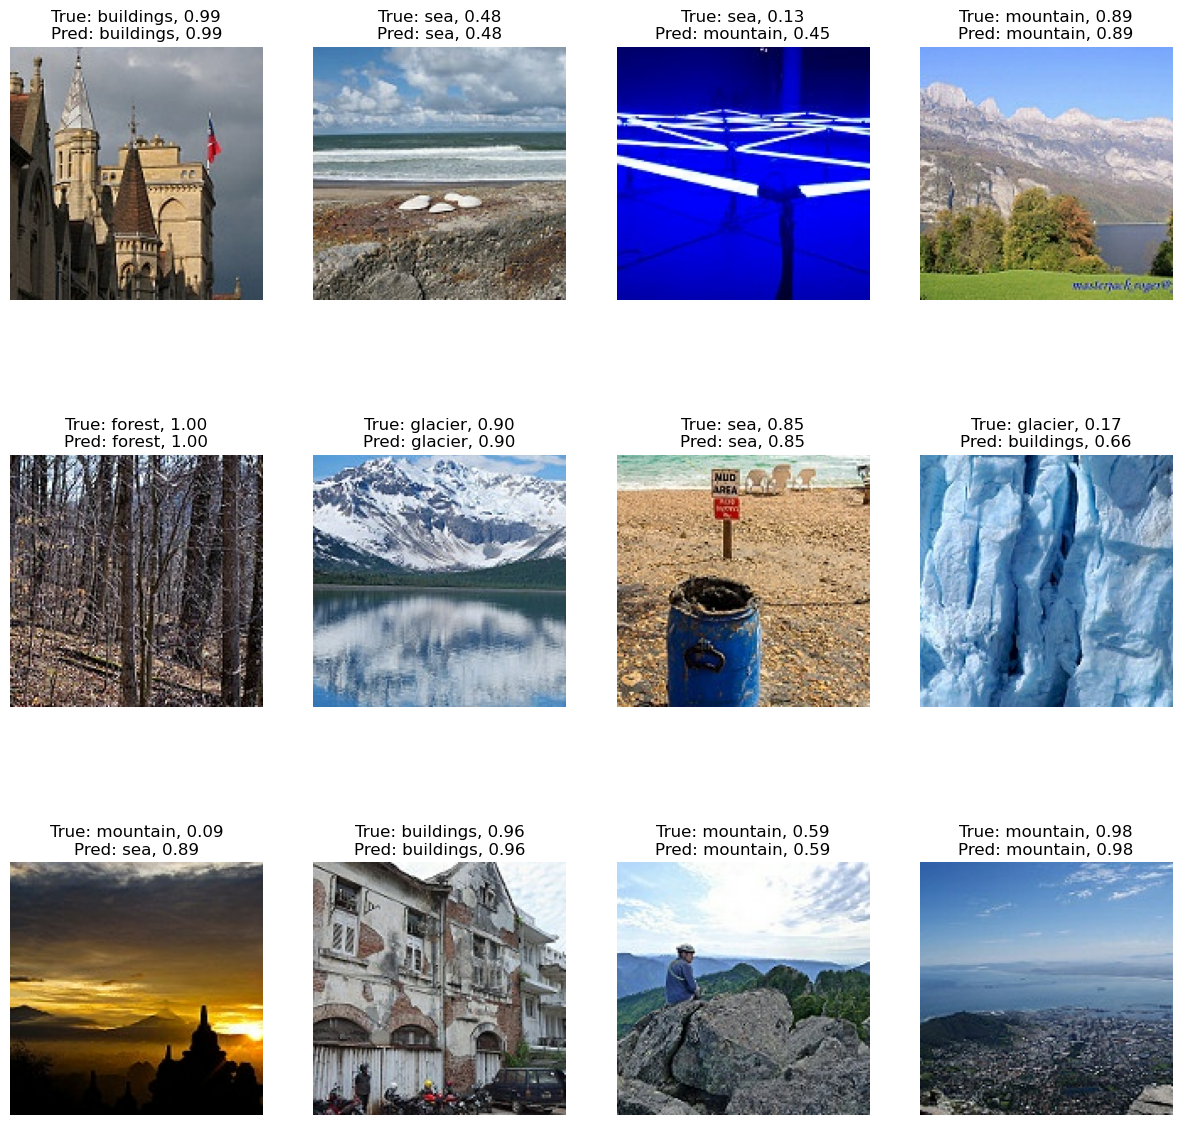

In [68]:
show_images_with_predictions(model_optimized)

## Confusion Matrix

1/1 [==============================] - 0s 111ms/step


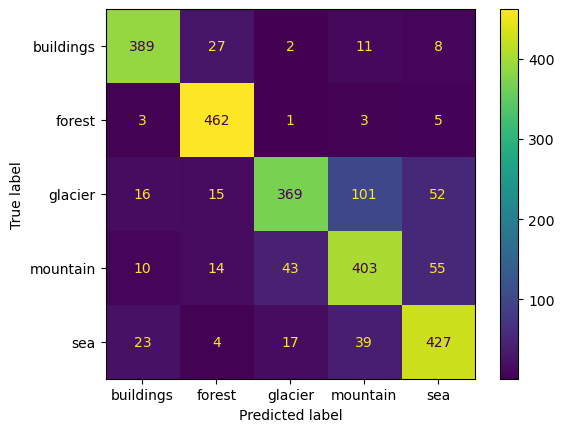

(array([0, 0, 0, ..., 2, 4, 3], dtype=int32), array([0, 0, 0, ..., 3, 4, 3]))

In [69]:
show_confusion_matrix(model_optimized)

As from the above Confusion Matrix, the predictions for the class forest and sea are very accurate while predictions for glacier are wrong over 50%. The class glacier got classified as sea 30% of the time, which could be the case because images of both classes contain smooth surfaces as well as blue-ish and white-ish colors. Interestingly, the class sea got predicted very accurately, which may indicated that the model tends to label sea instead of for example galcier if it is not a 100% clear.

# Summary
This project was exciting as it was challenging. It made us really try out numerous ways on how to tweak both performance in the sense of speed and of model accuracy. It is interesting how a small change can have a huge impact on the model's learning behavior. We've also extensively dealt with the over- and underfitting effects which consolidated our understanding on how and when to use regularization and generalization optimizations. 

In summary, creating a model with tensorflow is very easy and convenient but creating a performant model can be an overwhelming and time consuming process that can be frustrating at some point. But seeing the results of a successful improvement, on the other hand, is very satisfactory. The biggest difficulty in our opinion is to not loose the overview of the data handling. 

## Outlook
As a wrap-up we'd like to give a short outlook on what could be further steps to improve the model or to take the model into production.

### Export and Reuse
Tensorflow allows to export the weights of a trained model. In this way a new model can be initialized using the saved weights and can be used directly to make predictions on unseen data. This would be the method we'd use if we'd take this model to some productive use. 

### Deployment of the model
Furthermore, it would be possible to implement the model on a cloud-based platform or server for productive purposes. This would require making an API that can handle requests and return predictions, while also constructing the essential infrastructure required to handle the computational power.

### General Outlook
We are curious to see how machine learning will change the way everyone works and what impact it might have on our lives. In this example, how classifying images may help computervision thrive. We are delighted to be able to take an AI class and therefore learn more about AI as well as create and train our own models during such exciting times.